In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin/deepspeech


In [10]:
import os

import numpy as np
import torch
from torch.nn import functional as F
import torch.cuda.amp as amp
import matplotlib.pyplot as plt
import IPython.display as ipd
import wandb

from deepspeech import model, train, datasets, utils, predict

## Prediction

In [3]:
m, pt = predict.load('purzelrakete/feldberlin-deepspeech/212d0t74')
p = m.cfg

In [4]:
p.graphemes = np.array(p.graphemes)
p.graphemes

array(['א', 'כ', 'ל', 'ן', ' ', 'ϵ'], dtype='<U1')

In [5]:
ds = datasets.yesno(p)
ds = datasets.SpecAugmented(ds, p, masked=False)

In [11]:
batch_size = 8
batch = [ds[i] for i in range(batch_size)]
x, xn, y, yn = datasets.batch(p)(batch)

In [7]:
yhat, loss = predict.predict(m, x, xn, y, yn)
loss

tensor(0.8940, device='cuda:0')

In [8]:
predict.decode_argmax(yhat, p)

['א', 'א', 'א', 'א', 'א', 'א', 'א', 'א']

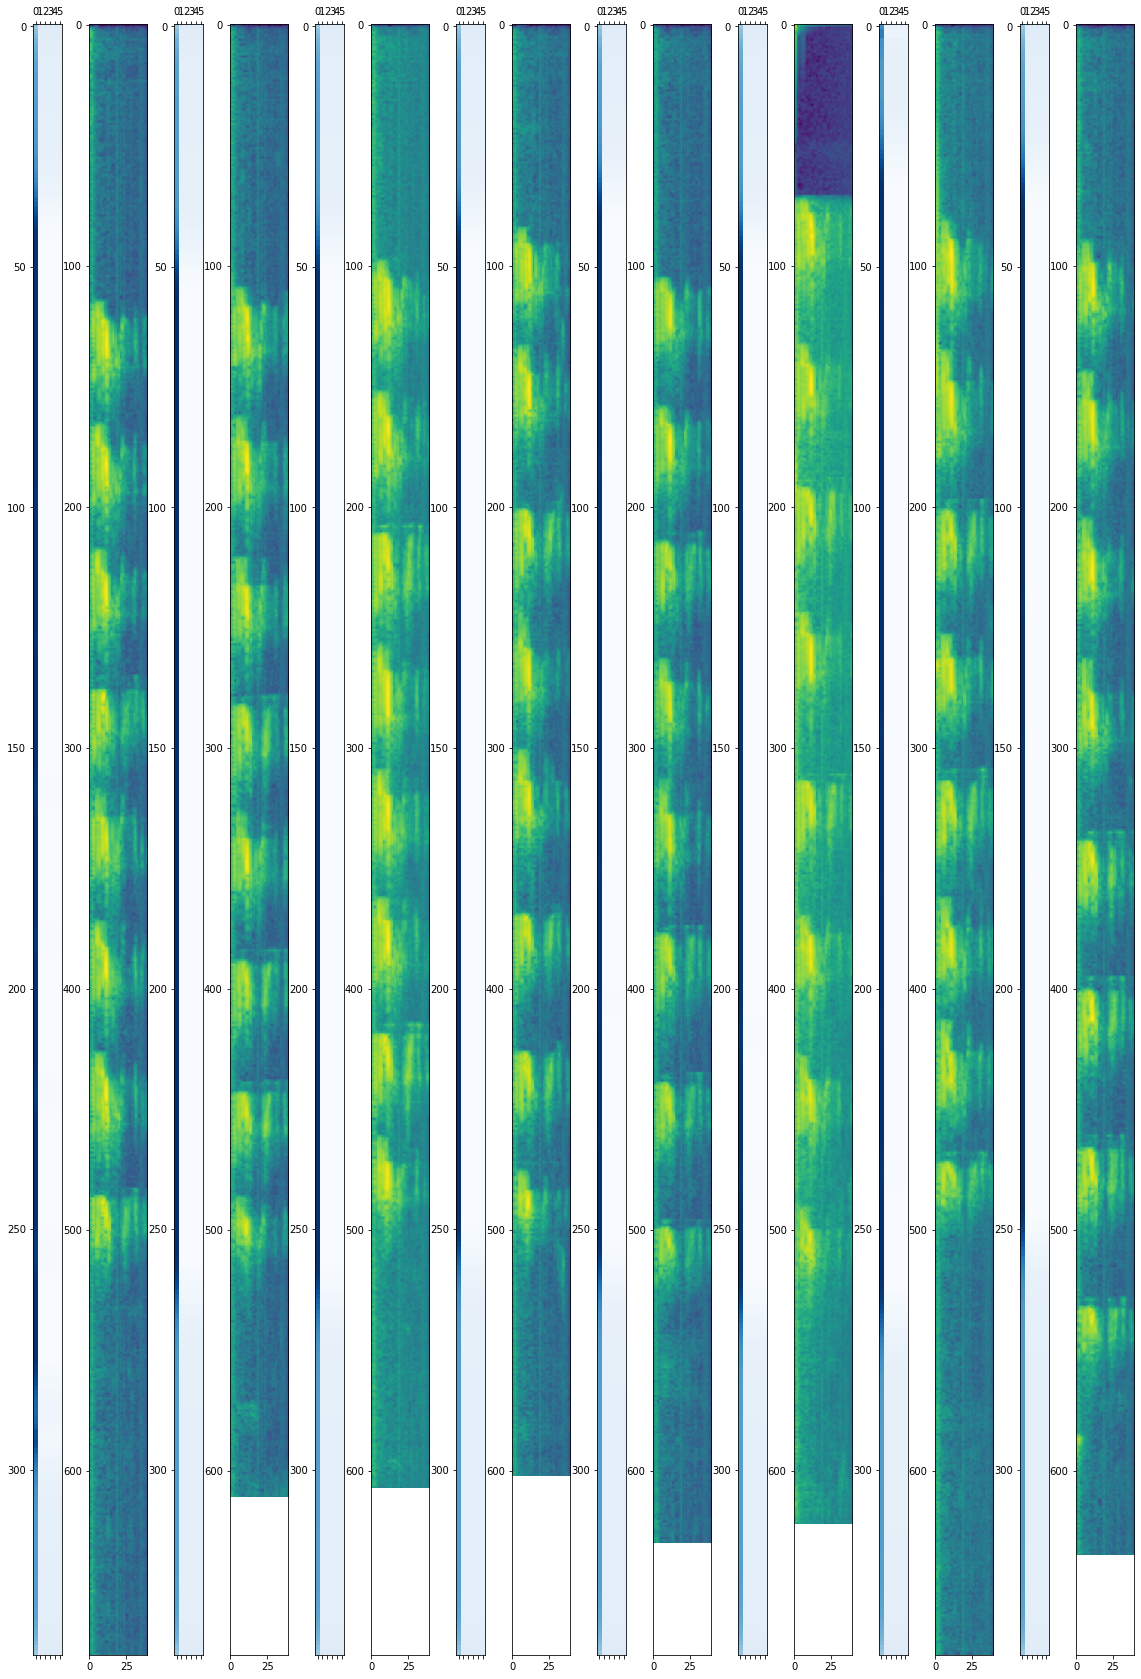

In [9]:
fig, axs = plt.subplots(1, batch_size * 2, figsize=(20, 30))
for i in range(batch_size):
    preds = torch.exp(yhat[i]).cpu().numpy()
    sound = x[i].log2().cpu().numpy().T
    axs[i*2].matshow(preds, cmap=plt.cm.Blues)
    axs[i*2-1].imshow(sound, aspect='auto')